# New Section

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  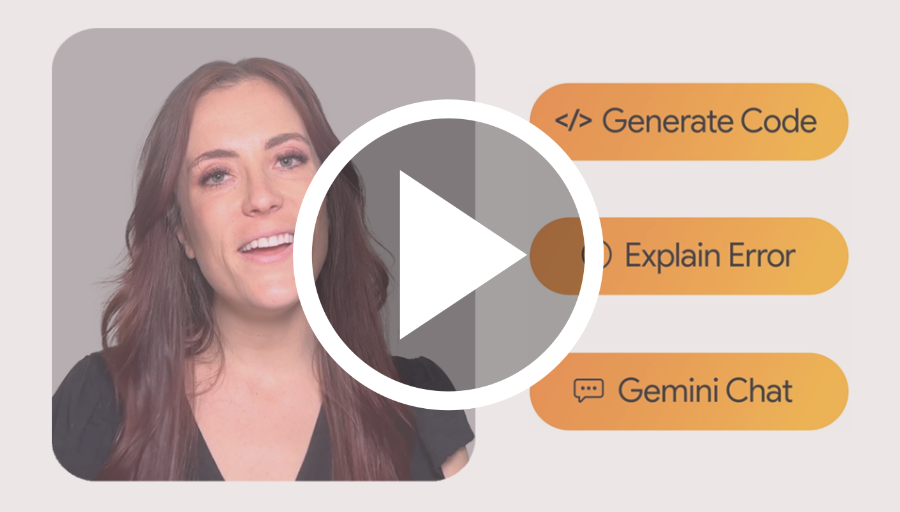
  </a>
</center>

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

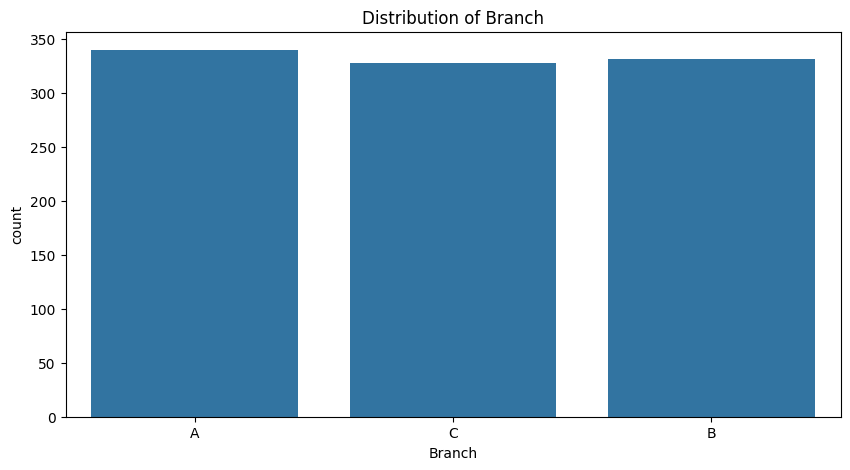

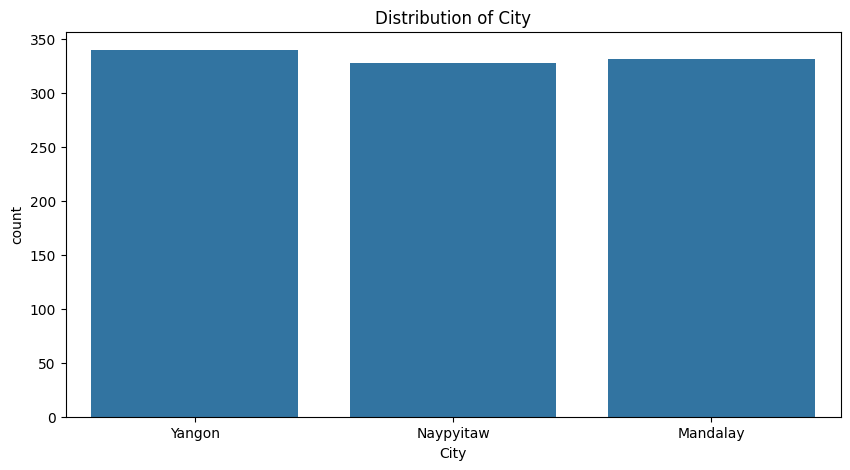

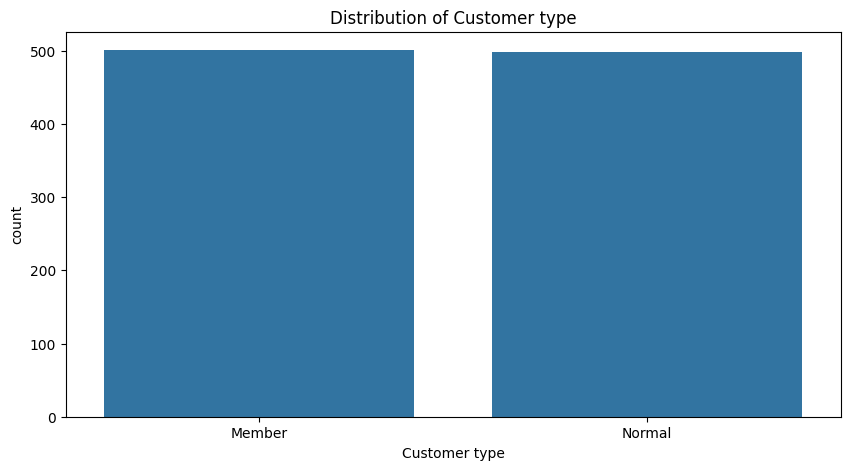

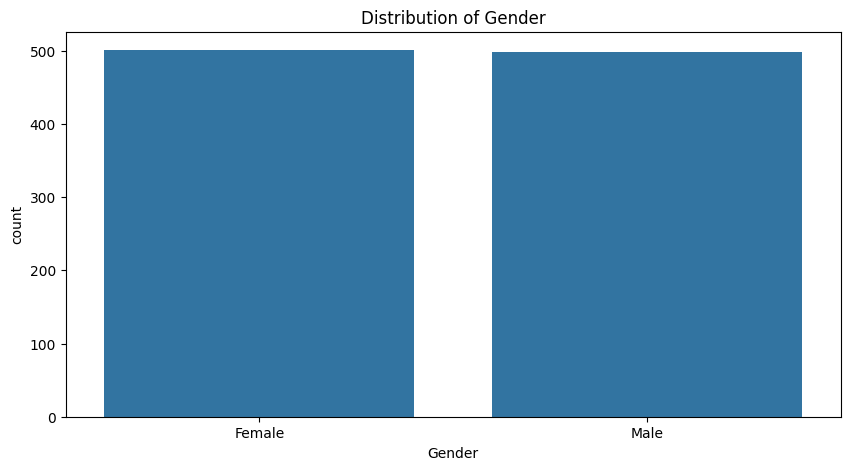

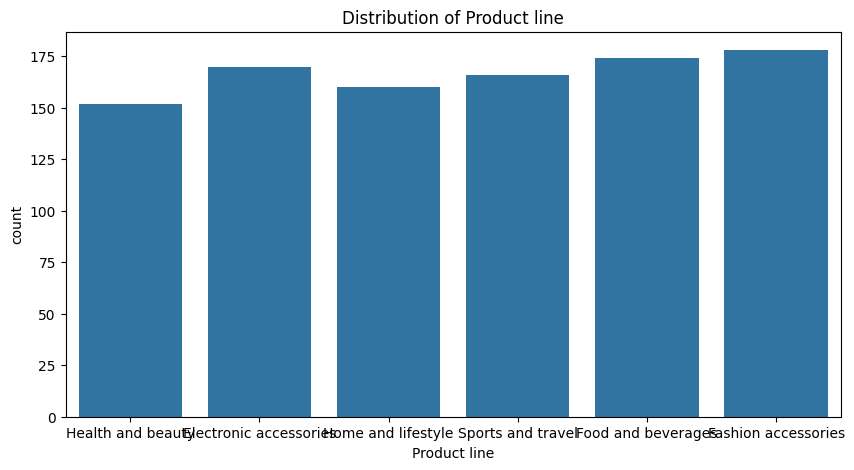

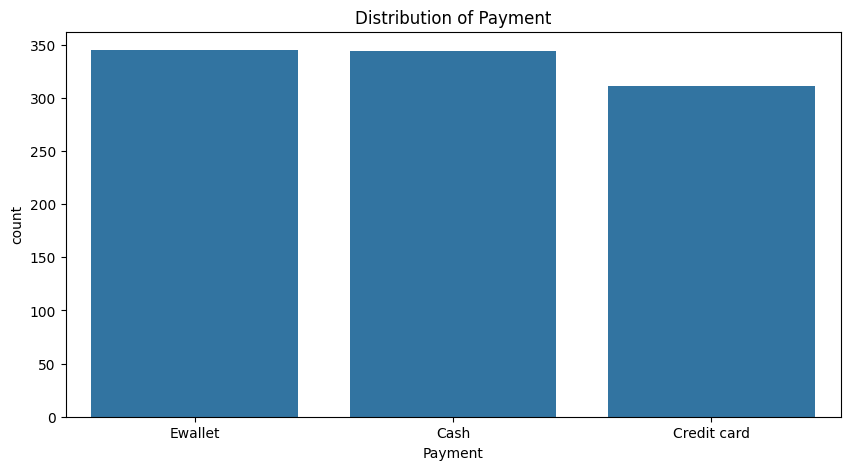

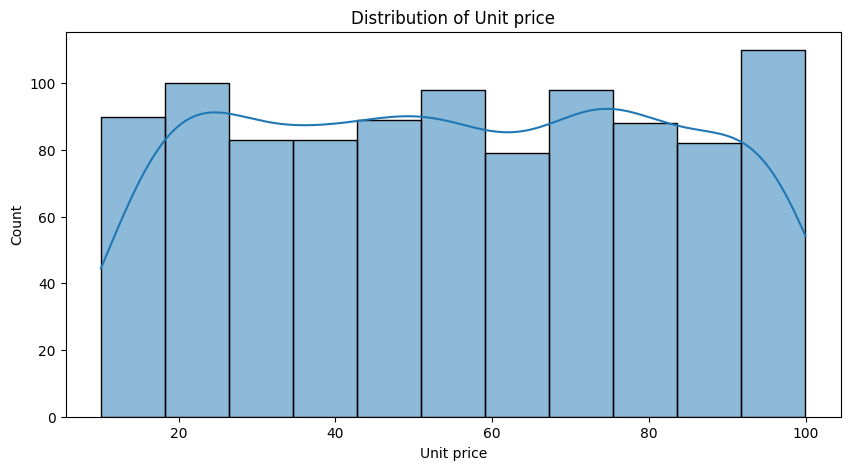

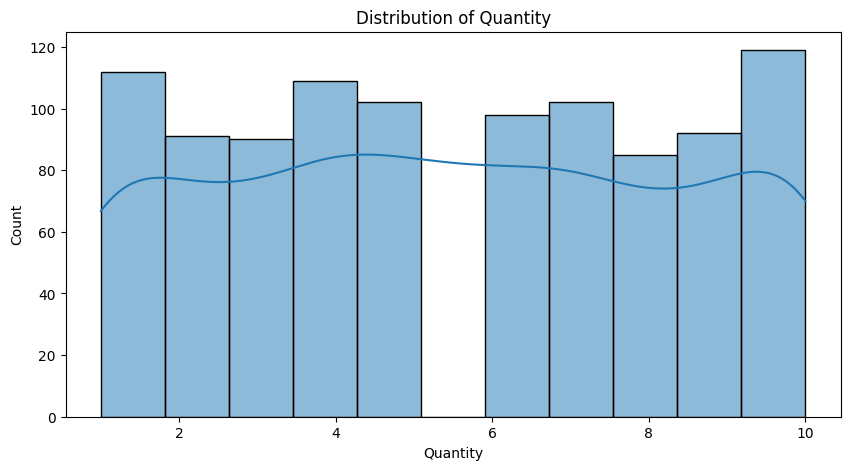

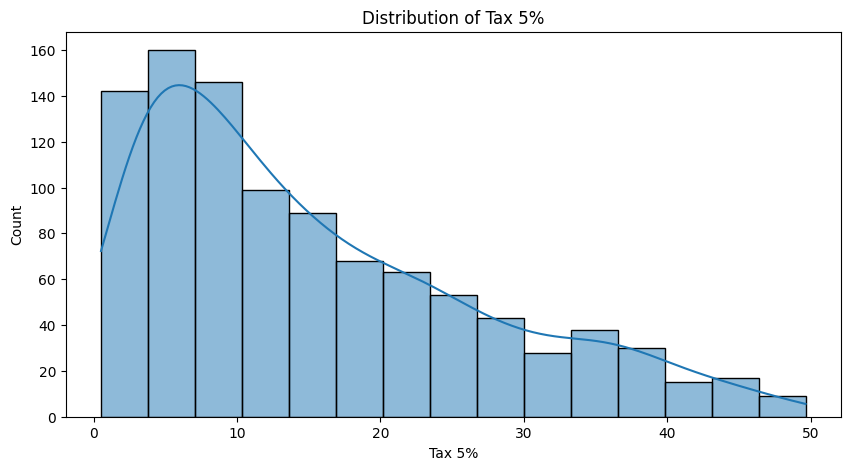

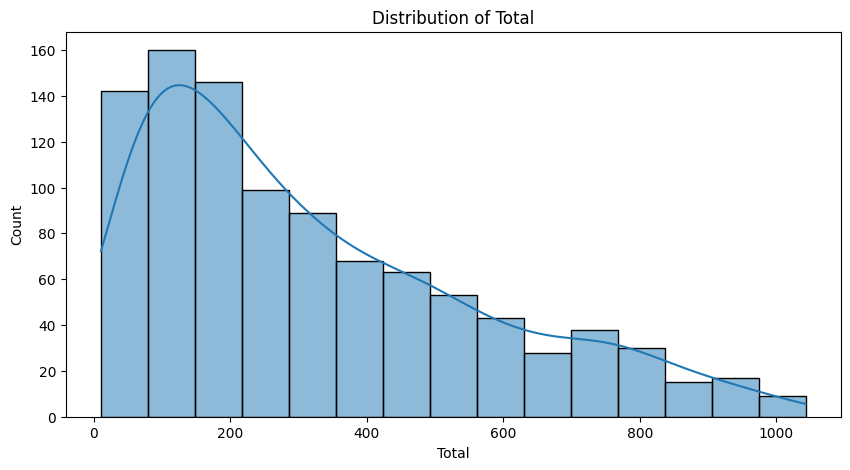

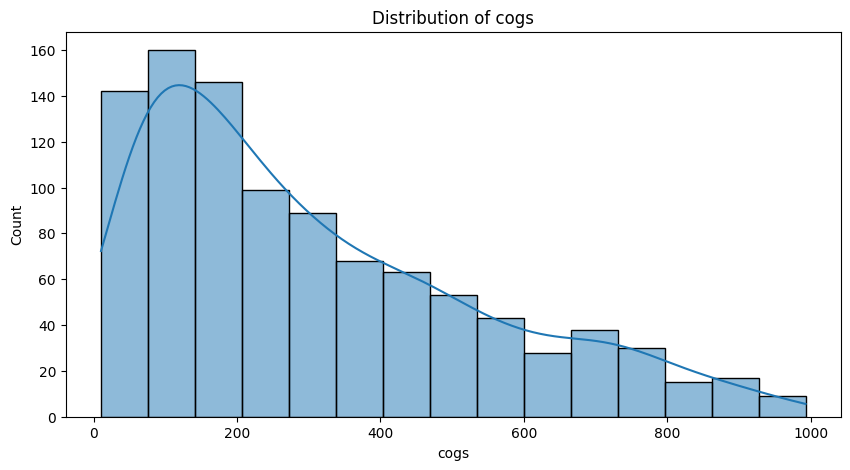

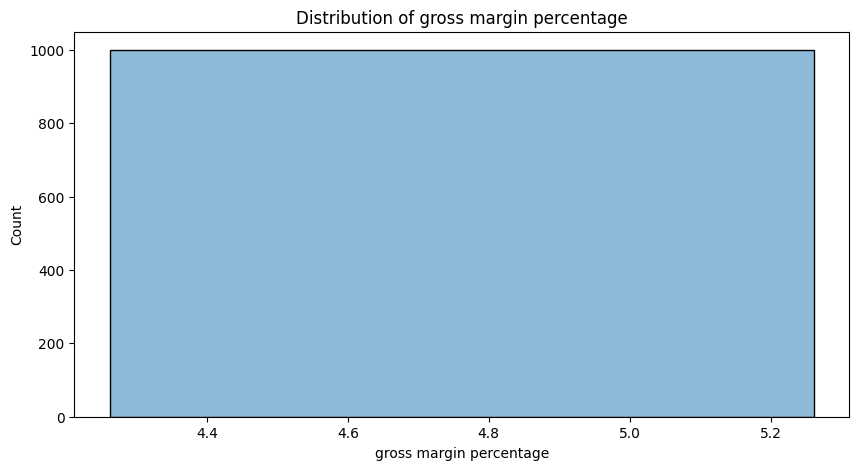

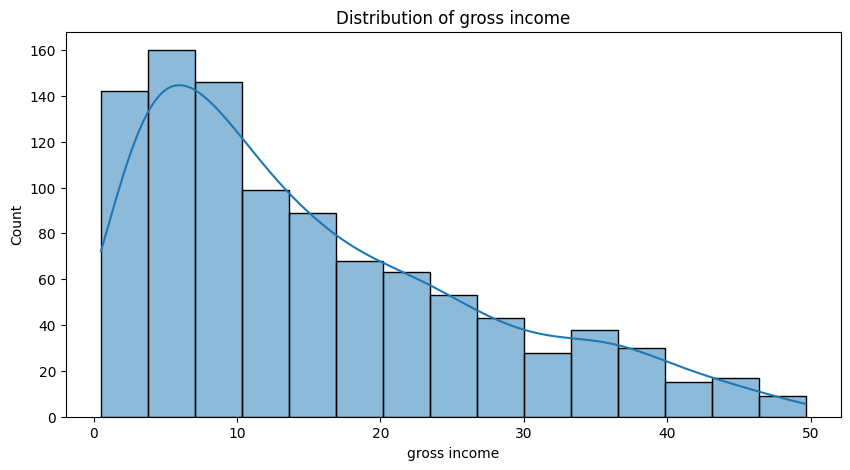

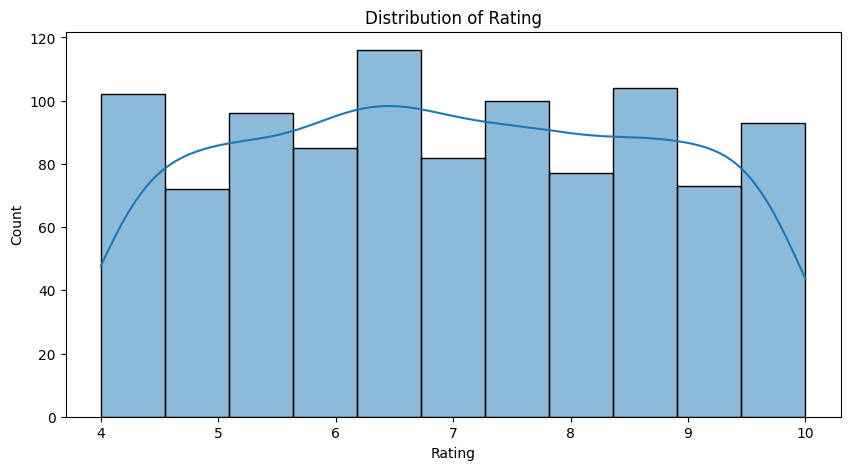

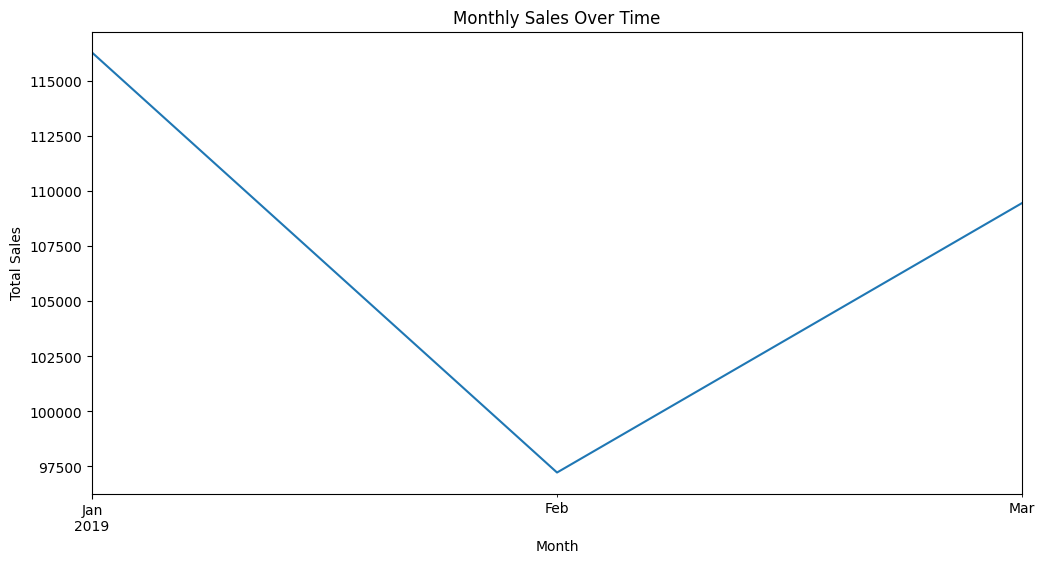

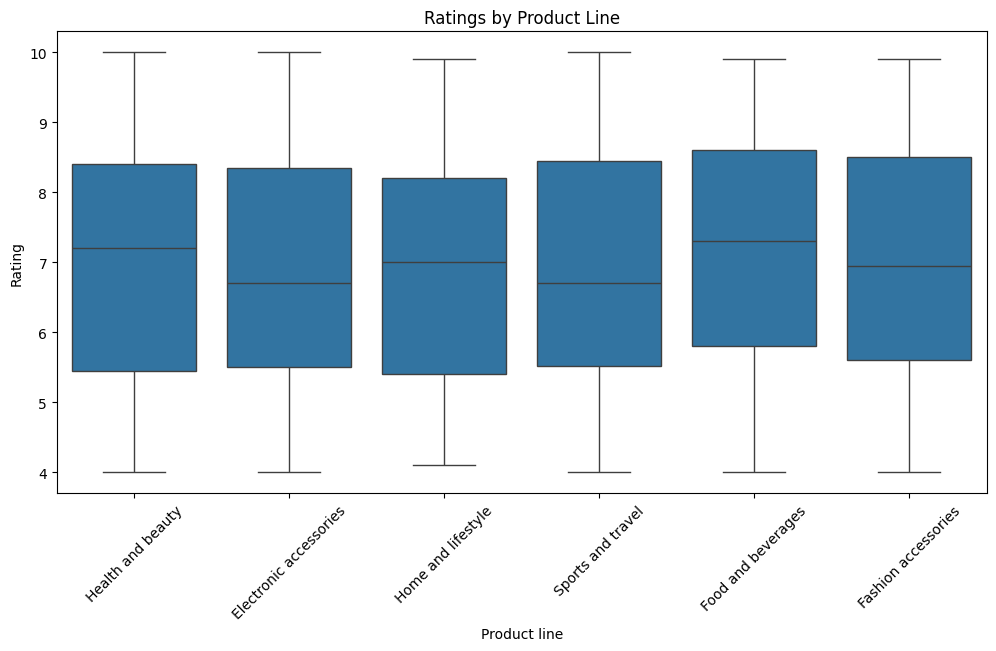

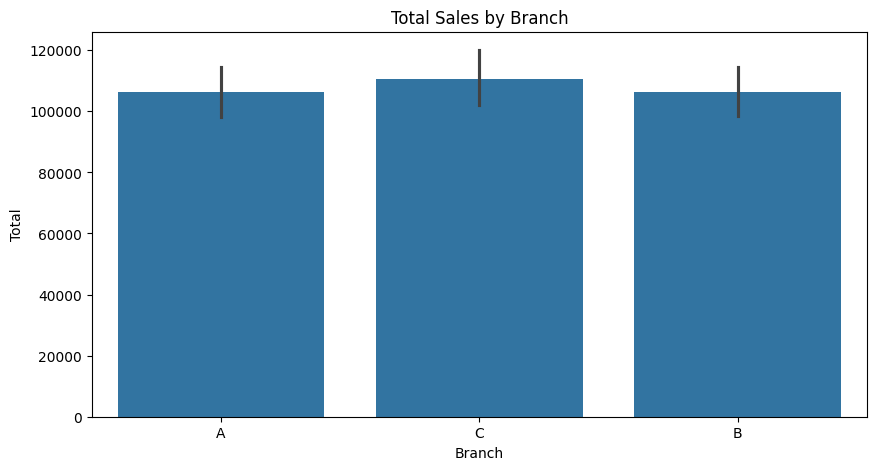

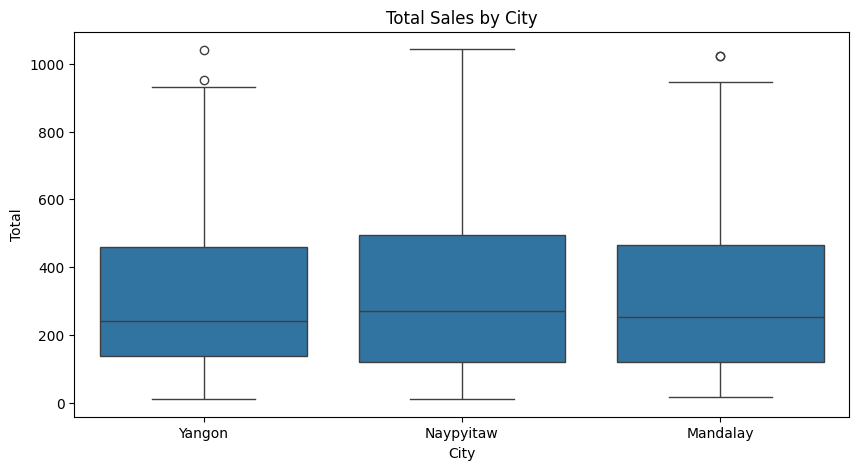

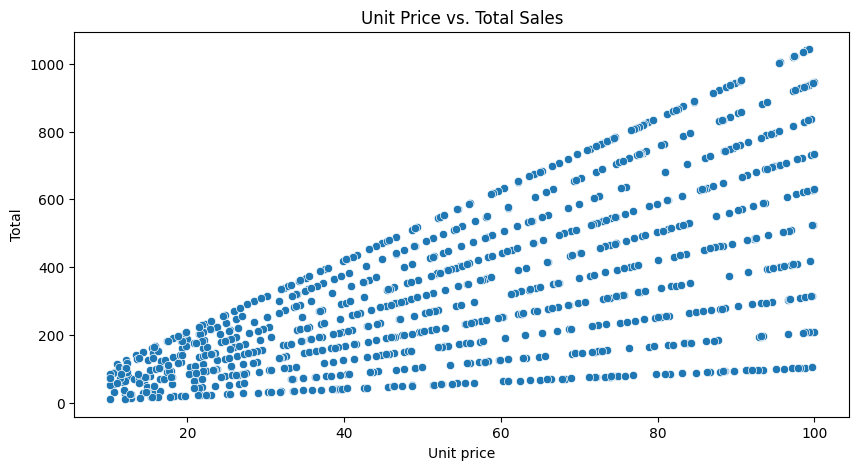

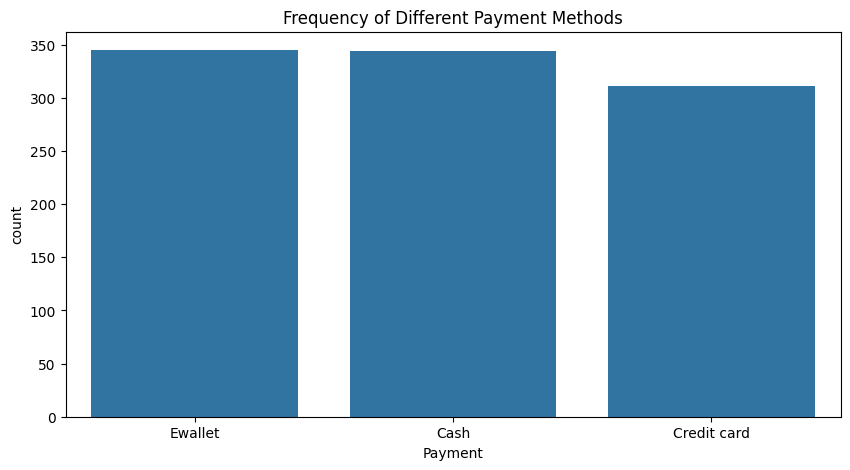

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of categorical variables
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of numerical variables
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Time series analysis (if Date and Time are combined or need analysis)
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Total'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Box plot for Ratings by Product Line
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='Rating', data=data)
plt.title('Ratings by Product Line')
plt.xticks(rotation=45)
plt.show()

# Bar plot for total sales by branch
plt.figure(figsize=(10, 5))
sns.barplot(x='Branch', y='Total', data=data, estimator=sum)
plt.title('Total Sales by Branch')
plt.show()

# Box plot for total sales by city
plt.figure(figsize=(10, 5))
sns.boxplot(x='City', y='Total', data=data)
plt.title('Total Sales by City')
plt.show()

# Scatter plot for unit price vs. total sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Unit price', y='Total', data=data)
plt.title('Unit Price vs. Total Sales')
plt.show()

# Count plot for different payment methods
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment', data=data)
plt.title('Frequency of Different Payment Methods')
plt.show()


Mean Squared Error: 0.00
R-squared: 1.00


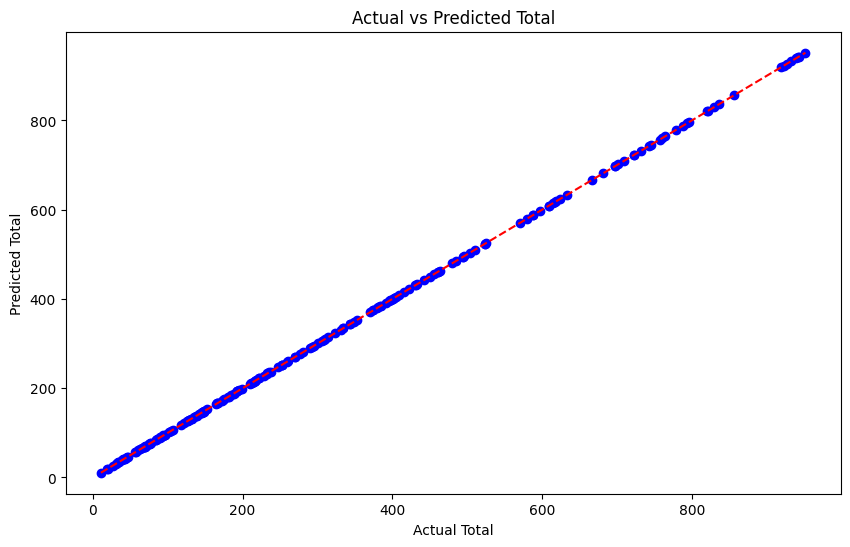

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and extract month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

# Select features and target variable
X = data[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Month']]
y = data['Total']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title('Actual vs Predicted Total')
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file and prepare the data
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)

# Select the necessary columns and process the data
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target variable
X = data[['Unit price', 'Quantity', 'Month', 'Day']]
y = data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Predict future sales (example)
X_new = pd.DataFrame({
    'Unit price': [20],
    'Quantity': [10],
    'Month': [8],
    'Day': [15]
})
y_future_pred = model.predict(X_new)
print(f'Dự đoán doanh số cho dữ liệu mới: {y_future_pred[0]:.2f}')


Mean Squared Error: 6232.13
R-squared: 0.90
Dự đoán doanh số cho dữ liệu mới: 377.81


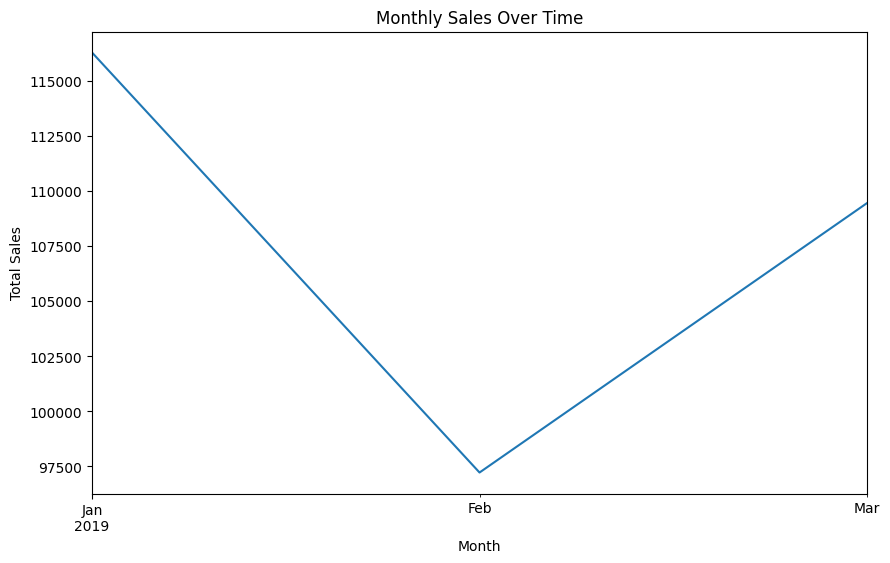

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime and extract month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')

# Group by month and calculate total sales
monthly_sales = data.groupby('Month')['Total'].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


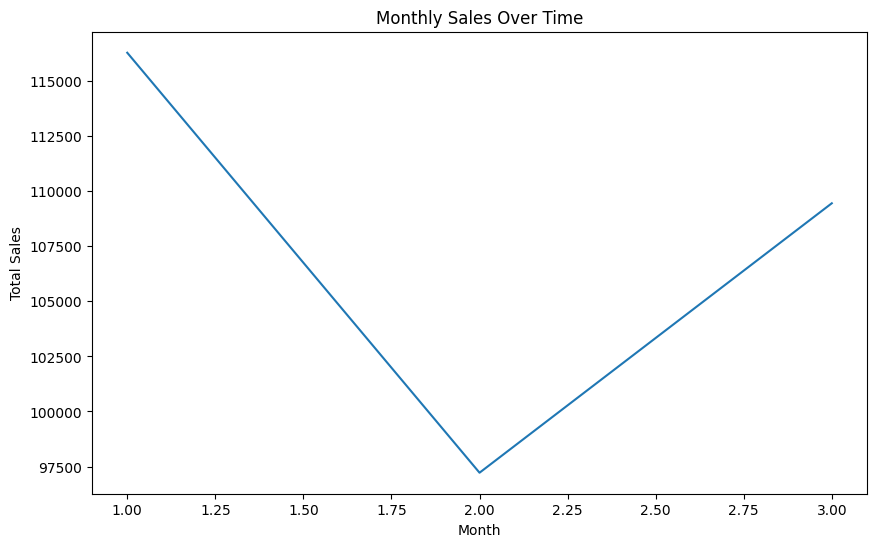

Mean Squared Error: 6232.13
R-squared: 0.90
Predicted Future Sales: 377.81


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Step 2: Exploratory Data Analysis (EDA)
monthly_sales = data.groupby('Month')['Total'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Step 3: Feature Engineering
X = data[['Unit price', 'Quantity', 'Month', 'Day']]
y = data['Total']

# Step 4: Model Development
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Step 6: Prediction
X_new = pd.DataFrame({
    'Unit price': [20],
    'Quantity': [10],
    'Month': [8],
    'Day': [15]
})
y_future_pred = model.predict(X_new)
print(f'Predicted Future Sales: {y_future_pred[0]:.2f}')
